# Testing Code of BanglaBERT

> **Important**: This code is written to run on *Cloud TPUs*.

# Import Necessary Libraries

In [1]:
# Uncomment the below code if the notebook is run on Google Colab.

!git clone https://github.com/abirmondal/detect-abusive-comment.git

Cloning into 'detect-abusive-comment'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 90 (delta 28), reused 70 (delta 19), pack-reused 0
Receiving objects: 100% (90/90), 36.58 MiB | 18.40 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [12]:
utils_folder_path = '/content/detect-abusive-comment/src/utils'

import os
os.chdir(utils_folder_path)
import dataset as ds
import model_report as mr

# Initialize Cloud TPUs

In [3]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

# Load Dataset

In [14]:
df_test = ds.get_test_set()

# Load Dataset Embeddings

In [15]:
dataset_embeddings_folder_location = '/content/drive/MyDrive/B.Tech. Final Year Project/Offensive Language Detection/Datasets/m_dataset_21_9/dataset_embeddings_12_10/'

df_test_embeddings = np.load(dataset_embeddings_folder_location+'test.npy')

In [16]:
X_test = df_test_embeddings
y_test = df_test['hate']

# Load Pre-trined Model

In [19]:
binary_classification_model_path = '/content/detect-abusive-comment/src/models/m_data_21_9_banglabert_100_4_77_77.keras'

with strategy.scope():
    binary_classification_model = tf.keras.models.load_model(binary_classification_model_path)

# Prediction of test set from Model

In [20]:
y_test_pred = binary_classification_model.predict(X_test)

565/565 [==============================] - 14s 22ms/step


# Threshold Labelling

In [24]:
binary_threshold = 0.4
def pred_of_y_labelling(y):
    return (1 if y[0] > binary_threshold else 0)

y_pred = np.apply_along_axis(pred_of_y_labelling, 1, y_test_pred)

# Model Report

In [25]:
mr.model_eval(y_pred, y_test)

    Accuracy Score:  0.768941280646411
Weighted Precision:  0.767584496933316
   Weighted Recall:  0.7107298211696472
          F1-Score:  0.7380638684986512

Classification Report :-
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      9793
           1       0.77      0.71      0.74      8276

    accuracy                           0.77     18069
   macro avg       0.77      0.76      0.77     18069
weighted avg       0.77      0.77      0.77     18069



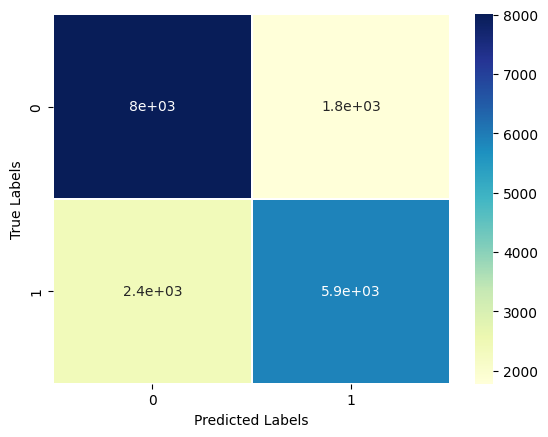

In [26]:
mr.confusion_mat(y_pred, y_test)